# US Hiring and Visa Applications

### Importing Dependencies and Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('H1Bdata.csv',encoding='latin-1')

In [68]:
df['PREVAILING_WAGE'] = 2*df['PREVAILING_WAGE']

### Extracting H1-B Visa applications with 'Certified' status 

In [69]:
certified = df[df['CASE_STATUS']=='CERTIFIED']

In [70]:
certified.shape

(79165, 18)

In [71]:
certified_H1B = certified[certified['VISA_CLASS']=='H-1B']

In [72]:
certified_H1B.shape

(76272, 18)

### Top 10 occupations for H1B visas with certified status

In [73]:
certified_H1B.JOB_TITLE.value_counts().head(10)


PROGRAMMER ANALYST          5223
SOFTWARE ENGINEER           3116
SOFTWARE DEVELOPER          1450
SYSTEMS ANALYST             1234
SENIOR SOFTWARE ENGINEER    1201
COMPUTER PROGRAMMER          888
DEVELOPER                    733
BUSINESS ANALYST             729
COMPUTER SYSTEMS ANALYST     657
APPLICATION DEVELOPER        629
Name: JOB_TITLE, dtype: int64

### Extracting applications made by Data Scientists

In [74]:
data_scientist = df[df['JOB_TITLE']=='DATA SCIENTIST']

In [75]:
data_scientist.shape

(162, 18)

### Company-wise hiring of Data Scientists

In [76]:
data_scientist.EMPLOYER_NAME.value_counts().head(10)


MICROSOFT CORPORATION                  40
FACEBOOK, INC.                         12
UBER TECHNOLOGIES, INC.                 6
THE NIELSEN COMPANY (US), LLC           4
INTEL CORPORATION                       4
SCHLUMBERGER TECHNOLOGY CORPORATION     4
WAL-MART ASSOCIATES, INC.               3
IBM CORPORATION                         3
LYFT, INC.                              2
THE METHODIST HOSPITAL                  2
Name: EMPLOYER_NAME, dtype: int64

### Calculation of wage difference between Data Scientists and other applications

In [77]:
data_scientists_mean = data_scientist.PREVAILING_WAGE.mean()

In [78]:
data_scientists_mean

177292.0864197531

In [79]:
all_applications_mean = df.PREVAILING_WAGE.mean()

In [80]:
difference_in_wage = data_scientists_mean - all_applications_mean

In [81]:
difference_in_wage

25822.91055668873

In [82]:
df.CASE_STATUS.value_counts()

CERTIFIED              79165
CERTIFIED-WITHDRAWN     9809
WITHDRAWN               3190
DENIED                  1369
Name: CASE_STATUS, dtype: int64

### Extracting Denied applications for state wise analysis

In [83]:
denied = df[df['CASE_STATUS']=='DENIED']

In [84]:
# denied_per_state = pd.DataFrame(data=denied.EMPLOYER_STATE.value_counts())

In [85]:
    denied_per_state = denied.EMPLOYER_STATE.value_counts().rename_axis('EMPLOYER_STATE').reset_index(name='COUNT')

In [86]:
# applied_per_state = pd.DataFrame(data=df.EMPLOYER_STATE.value_counts())

In [87]:
applied_per_state = df.EMPLOYER_STATE.value_counts().rename_axis('EMPLOYER_STATE').reset_index(name='COUNT')

In [88]:
denied_per_state.sum()

EMPLOYER_STATE    CANYTXNJPAFLILMAWAVAMINCGAMNOHTNMPCOCTAZMDDEIN...
COUNT                                                          1369
dtype: object

In [89]:
deny_ratio_state = pd.merge(denied_per_state, applied_per_state,on=['EMPLOYER_STATE'])

In [90]:
deny_ratio_state['%age decline rate'] = deny_ratio_state['COUNT_x']/deny_ratio_state['COUNT_y']

In [91]:
deny_ratio_state['%age decline rate'] = deny_ratio_state['%age decline rate']*100

### Percentage Decline Rate by State (to number of applications)

In [92]:
deny_ratio_state.sort_values(by=['%age decline rate'], ascending=False)

,EMPLOYER_STATE,COUNT_x,COUNT_y,%age decline rate
16,MP,17,75,22.666667
24,HI,9,69,13.043478
43,MT,2,17,11.764706
44,AK,1,12,8.333333
26,NV,9,128,7.031250
45,PR,1,17,5.882353
39,ME,4,74,5.405405
32,AL,6,127,4.724409
40,GU,3,71,4.225352
29,RI,8,196,4.081633


In [93]:
deny_ratio_state.shape

(46, 4)

In [94]:
states = pd.read_csv('Project 1 Data states population.csv', encoding = 'latin-1')

In [95]:
states.shape

(51, 4)

In [96]:
states['EMPLOYER_STATE'] = states['State abbreviation']

In [97]:
states = states.drop(columns=['State abbreviation'])

In [98]:
deny_ratio_population = pd.merge(deny_ratio_state, states,on=['EMPLOYER_STATE'])

In [99]:
deny_ratio_population['%age decline to population'] = (deny_ratio_population['COUNT_x']/deny_ratio_population['Population estimate'])*100

### Percentage Decline Rate by State (to it's population)

In [100]:
deny_ratio_population.sort_values(by=['%age decline to population'], ascending = False)

,EMPLOYER_STATE,COUNT_x,COUNT_y,%age decline rate,State,Population estimate,Unnamed: 3,%age decline to population
21,DE,12,297,4.040404,Delaware,952065,NaN,0.001260
3,NJ,90,11134,0.808335,New Jersey,8944469,NaN,0.001006
1,NY,164,6606,2.482592,New York,19745289,NaN,0.000831
28,RI,8,196,4.081633,Rhode Island,1056426,NaN,0.000757
7,MA,48,3319,1.446219,Massachusetts,6811779,NaN,0.000705
8,WA,48,3969,1.209373,Washington,7288000,NaN,0.000659
0,CA,257,15293,1.680507,California,39250017,NaN,0.000655
23,HI,9,69,13.043478,Hawaii,1428557,NaN,0.000630
4,PA,77,3704,2.078834,Pennsylvania,12802503,NaN,0.000601
16,MP,17,75,22.666667,Mississippi,2988726,NaN,0.000569


In [101]:
df.NAICS_CODE.value_counts().head(5)

541511    31941
54151      5587
541512     5311
611310     5100
5416       3689
Name: NAICS_CODE, dtype: int64

In [102]:
df.NAICS_CODE.value_counts().sum()

93533

In [103]:
denied[['Date_submitted','Month_submitted','Year_Submitted']] = denied.CASE_SUBMITTED.str.split('-',expand=True)

In [104]:
denied.drop(columns = ['Date_submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Month_submitted,Year_Submitted
10,I-203-16279-312475,DENIED,05-10-2016,07-10-2016,E-3 Australian,18-10-2016,15-05-2018,TRAX OUTDOOR CENTER,AK,99708,COACHES AND SCOUTS,27-2022,COACHES AND SCOUTS,451110,26,10,2016
39,I-200-16286-971857,DENIED,12-10-2016,14-10-2016,H-1B,01-11-2016,31-10-2018,THE UNIV. OF ALA. AT BIRMINGHAM (UAB),AL,35294,INSTRUCTOR,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",61131,133828,10,2016
49,I-200-16294-204933,DENIED,20-10-2016,26-10-2016,H-1B,10-01-2017,10-01-2018,WEST LAUDERDALE VETERINARY HOSPITAL,AL,35633,VETERINARIAN,29-1131,VETERINARIANS,541940,64,10,2016
75,I-200-16308-555474,DENIED,08-11-2016,10-11-2016,H-1B,10-11-2016,09-11-2019,"EBSCO INDUSTRIES, INC.",AL,35242,SAP DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",511120,169894,11,2016
94,I-200-16322-917453,DENIED,09-12-2016,15-12-2016,H-1B,02-01-2017,20-09-2019,"CANFOR SOUTHERN PINE, INC.",AL,36602,SENIOR BUSINESS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,3219,144268,12,2016
124,I-200-16344-497519,DENIED,13-12-2016,15-12-2016,H-1B,09-01-2017,08-01-2020,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,35010,ADVANCED MANUFACTURING EXPERT/ADJUNCT FACULTY,25-1194,"VOCATIONAL EDUCATION TEACHERS, POSTSECONDARY",6113,38,12,2016
134,I-200-16356-376409,DENIED,21-12-2016,27-12-2016,H-1B,16-01-2017,15-01-2020,BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD,AL,36509,INTERNIST,29-1063,"INTERNISTS, GENERAL",621111,358712,12,2016
284,I-200-16300-046294,DENIED,27-10-2016,31-10-2016,H-1B,09-11-2016,09-11-2019,"WAL-MART ASSOCIATES, INC.",AR,72716,PRODUCT MANAGER,15-2031,OPERATIONS RESEARCH ANALYSTS,452910,230422,10,2016
295,I-200-16302-101608,DENIED,01-11-2016,03-11-2016,H-1B,01-03-2017,28-02-2020,PROTECH SOLUTIONS INC.,AR,72201,WEB DEVELOPER,15-1134,WEB DEVELOPERS,541511,131332,11,2016
324,I-200-16309-656026,DENIED,04-11-2016,07-11-2016,H-1B,30-11-2016,30-11-2017,UNIVERSITY OF ARKANSAS AT PINE BLUFF,AR,71601,EXTENSION SPECIALIST/INSTRUCTOR,19-1013,SOIL AND PLANT SCIENTISTS,611310,97802,11,2016


In [105]:
denied.drop(columns = ['Year_Submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Date_submitted,Month_submitted
10,I-203-16279-312475,DENIED,05-10-2016,07-10-2016,E-3 Australian,18-10-2016,15-05-2018,TRAX OUTDOOR CENTER,AK,99708,COACHES AND SCOUTS,27-2022,COACHES AND SCOUTS,451110,26,05,10
39,I-200-16286-971857,DENIED,12-10-2016,14-10-2016,H-1B,01-11-2016,31-10-2018,THE UNIV. OF ALA. AT BIRMINGHAM (UAB),AL,35294,INSTRUCTOR,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",61131,133828,12,10
49,I-200-16294-204933,DENIED,20-10-2016,26-10-2016,H-1B,10-01-2017,10-01-2018,WEST LAUDERDALE VETERINARY HOSPITAL,AL,35633,VETERINARIAN,29-1131,VETERINARIANS,541940,64,20,10
75,I-200-16308-555474,DENIED,08-11-2016,10-11-2016,H-1B,10-11-2016,09-11-2019,"EBSCO INDUSTRIES, INC.",AL,35242,SAP DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",511120,169894,08,11
94,I-200-16322-917453,DENIED,09-12-2016,15-12-2016,H-1B,02-01-2017,20-09-2019,"CANFOR SOUTHERN PINE, INC.",AL,36602,SENIOR BUSINESS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,3219,144268,09,12
124,I-200-16344-497519,DENIED,13-12-2016,15-12-2016,H-1B,09-01-2017,08-01-2020,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,35010,ADVANCED MANUFACTURING EXPERT/ADJUNCT FACULTY,25-1194,"VOCATIONAL EDUCATION TEACHERS, POSTSECONDARY",6113,38,13,12
134,I-200-16356-376409,DENIED,21-12-2016,27-12-2016,H-1B,16-01-2017,15-01-2020,BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD,AL,36509,INTERNIST,29-1063,"INTERNISTS, GENERAL",621111,358712,21,12
284,I-200-16300-046294,DENIED,27-10-2016,31-10-2016,H-1B,09-11-2016,09-11-2019,"WAL-MART ASSOCIATES, INC.",AR,72716,PRODUCT MANAGER,15-2031,OPERATIONS RESEARCH ANALYSTS,452910,230422,27,10
295,I-200-16302-101608,DENIED,01-11-2016,03-11-2016,H-1B,01-03-2017,28-02-2020,PROTECH SOLUTIONS INC.,AR,72201,WEB DEVELOPER,15-1134,WEB DEVELOPERS,541511,131332,01,11
324,I-200-16309-656026,DENIED,04-11-2016,07-11-2016,H-1B,30-11-2016,30-11-2017,UNIVERSITY OF ARKANSAS AT PINE BLUFF,AR,71601,EXTENSION SPECIALIST/INSTRUCTOR,19-1013,SOIL AND PLANT SCIENTISTS,611310,97802,04,11


In [106]:
denied_monthwise = denied.Month_submitted.value_counts()

In [107]:
df[['Date_submitted','Month_submitted','Year_Submitted']] = df.CASE_SUBMITTED.str.split('-',expand=True)

In [108]:
df.drop(columns = ['Date_submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Month_submitted,Year_Submitted
0,I-200-16217-457990,CERTIFIED-WITHDRAWN,04-08-2016,17-10-2016,H-1B,01-10-2016,30-09-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSISTANT PROFESSOR,19-1099,"LIFE SCIENTISTS, ALL OTHER",611310,66,08,2016
1,I-200-16237-428149,CERTIFIED,27-10-2016,02-11-2016,H-1B,13-02-2017,12-02-2020,TECK ALASKA INCORPORATED,AK,99517,GEOTECHNICAL ENGINEER,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",212399,202468,10,2016
2,I-200-16246-242572,CERTIFIED,13-10-2016,20-10-2016,H-1B,19-02-2017,18-02-2020,GCI COMMUNICATION CORP.,AK,99503,"ENGINEER III, SOFTWARE",15-1121,COMPUTER SYSTEMS ANALYSTS,517212,165152,10,2016
3,I-200-16298-152195,CERTIFIED,25-10-2016,31-10-2016,H-1B,25-04-2017,24-04-2020,BARTLETT REGIONAL HOSPITAL,AK,99801,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,622110,76,10,2016
4,I-200-16299-211441,CERTIFIED,25-10-2016,31-10-2016,H-1B,01-12-2016,30-11-2018,"HAPPY TAILS, INC",AK,99507,VETERINARY ASSISTANT,31-9096,VETERINARY ASSISTANTS AND LABORATORY ANIMAL,541940,28,10,2016
5,I-200-16300-873012,CERTIFIED,26-10-2016,01-11-2016,H-1B,12-12-2016,11-12-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSOCIATE,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",611310,42,10,2016
6,I-200-16307-895462,CERTIFIED,16-11-2016,22-11-2016,H-1B,01-01-2017,31-12-2019,FOUNDATION HEALTH LLC,AK,99701,IT FACILITY CLINICAL SENIOR MANAGER,15-1121,COMPUTER SYSTEMS ANALYSTS,622110,150924,11,2016
7,I-200-16316-913331,CERTIFIED,14-11-2016,18-11-2016,H-1B,15-12-2016,14-12-2019,WRANGELL MEDICAL CENTER,AK,99929,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,62211,149302,11,2016
8,I-200-16342-867820,CERTIFIED,08-12-2016,14-12-2016,H-1B,15-12-2016,14-12-2019,"BUILDING BLOCKS SPEECH THERAPY, LLC",AK,99701,SPEECH LANGUAGE PATHOLOGIST,29-1127,SPEECH-LANGUAGE PATHOLOGISTS,621498,66,12,2016
9,I-200-16343-871311,CERTIFIED,08-12-2016,14-12-2016,H-1B,01-01-2017,31-12-2017,UNIVERSITY OF ALASKA,AK,99775,POST DOCTORAL FELLOW,19-1022,MICROBIOLOGISTS,611310,36,12,2016


In [109]:
df.drop(columns = ['Year_Submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Date_submitted,Month_submitted
0,I-200-16217-457990,CERTIFIED-WITHDRAWN,04-08-2016,17-10-2016,H-1B,01-10-2016,30-09-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSISTANT PROFESSOR,19-1099,"LIFE SCIENTISTS, ALL OTHER",611310,66,04,08
1,I-200-16237-428149,CERTIFIED,27-10-2016,02-11-2016,H-1B,13-02-2017,12-02-2020,TECK ALASKA INCORPORATED,AK,99517,GEOTECHNICAL ENGINEER,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",212399,202468,27,10
2,I-200-16246-242572,CERTIFIED,13-10-2016,20-10-2016,H-1B,19-02-2017,18-02-2020,GCI COMMUNICATION CORP.,AK,99503,"ENGINEER III, SOFTWARE",15-1121,COMPUTER SYSTEMS ANALYSTS,517212,165152,13,10
3,I-200-16298-152195,CERTIFIED,25-10-2016,31-10-2016,H-1B,25-04-2017,24-04-2020,BARTLETT REGIONAL HOSPITAL,AK,99801,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,622110,76,25,10
4,I-200-16299-211441,CERTIFIED,25-10-2016,31-10-2016,H-1B,01-12-2016,30-11-2018,"HAPPY TAILS, INC",AK,99507,VETERINARY ASSISTANT,31-9096,VETERINARY ASSISTANTS AND LABORATORY ANIMAL,541940,28,25,10
5,I-200-16300-873012,CERTIFIED,26-10-2016,01-11-2016,H-1B,12-12-2016,11-12-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSOCIATE,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",611310,42,26,10
6,I-200-16307-895462,CERTIFIED,16-11-2016,22-11-2016,H-1B,01-01-2017,31-12-2019,FOUNDATION HEALTH LLC,AK,99701,IT FACILITY CLINICAL SENIOR MANAGER,15-1121,COMPUTER SYSTEMS ANALYSTS,622110,150924,16,11
7,I-200-16316-913331,CERTIFIED,14-11-2016,18-11-2016,H-1B,15-12-2016,14-12-2019,WRANGELL MEDICAL CENTER,AK,99929,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,62211,149302,14,11
8,I-200-16342-867820,CERTIFIED,08-12-2016,14-12-2016,H-1B,15-12-2016,14-12-2019,"BUILDING BLOCKS SPEECH THERAPY, LLC",AK,99701,SPEECH LANGUAGE PATHOLOGIST,29-1127,SPEECH-LANGUAGE PATHOLOGISTS,621498,66,08,12
9,I-200-16343-871311,CERTIFIED,08-12-2016,14-12-2016,H-1B,01-01-2017,31-12-2017,UNIVERSITY OF ALASKA,AK,99775,POST DOCTORAL FELLOW,19-1022,MICROBIOLOGISTS,611310,36,08,12


In [110]:
applied_monthwise = df.Month_submitted.value_counts()

In [111]:
applied_monthwise

11    27829
10    27305
12    24860
09     5523
03     3011
02     1097
06     1046
04      624
08      601
05      584
01      530
07      523
Name: Month_submitted, dtype: int64

In [112]:
applied_monthwise = applied_monthwise.rename_axis('MONTH').reset_index(name='NUM_APPLICATIONS')

In [113]:
denied_monthwise = denied_monthwise.rename_axis('MONTH').reset_index(name='NUM_APPLICATIONS')

In [114]:
denied_monthwise = denied_monthwise.sort_values(by=['MONTH'])

In [115]:
applied_monthwise = applied_monthwise.sort_values(by=['MONTH'])

### Graphical Analysis of Denied applications to total (monthwise)

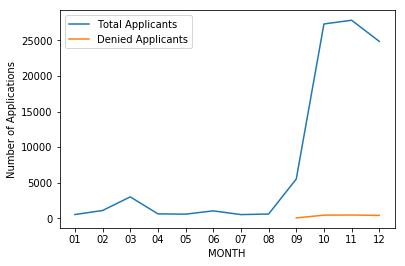

In [116]:
plt.plot(applied_monthwise.values[:,0],applied_monthwise.values[:,1],label = 'Total Applicants')
plt.plot(denied_monthwise.values[:,0],denied_monthwise.values[:,1], label = 'Denied Applicants')
plt.xlabel('MONTH')
plt.ylabel('Number of Applications')
plt.legend()

In [117]:
denied[['Date_submitted','Month_submitted','Year_Submitted']] = denied.DECISION_DATE.str.split('-',expand=True)

In [118]:
denied.drop(columns = ['Date_submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Month_submitted,Year_Submitted
10,I-203-16279-312475,DENIED,05-10-2016,07-10-2016,E-3 Australian,18-10-2016,15-05-2018,TRAX OUTDOOR CENTER,AK,99708,COACHES AND SCOUTS,27-2022,COACHES AND SCOUTS,451110,26,10,2016
39,I-200-16286-971857,DENIED,12-10-2016,14-10-2016,H-1B,01-11-2016,31-10-2018,THE UNIV. OF ALA. AT BIRMINGHAM (UAB),AL,35294,INSTRUCTOR,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",61131,133828,10,2016
49,I-200-16294-204933,DENIED,20-10-2016,26-10-2016,H-1B,10-01-2017,10-01-2018,WEST LAUDERDALE VETERINARY HOSPITAL,AL,35633,VETERINARIAN,29-1131,VETERINARIANS,541940,64,10,2016
75,I-200-16308-555474,DENIED,08-11-2016,10-11-2016,H-1B,10-11-2016,09-11-2019,"EBSCO INDUSTRIES, INC.",AL,35242,SAP DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",511120,169894,11,2016
94,I-200-16322-917453,DENIED,09-12-2016,15-12-2016,H-1B,02-01-2017,20-09-2019,"CANFOR SOUTHERN PINE, INC.",AL,36602,SENIOR BUSINESS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,3219,144268,12,2016
124,I-200-16344-497519,DENIED,13-12-2016,15-12-2016,H-1B,09-01-2017,08-01-2020,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,35010,ADVANCED MANUFACTURING EXPERT/ADJUNCT FACULTY,25-1194,"VOCATIONAL EDUCATION TEACHERS, POSTSECONDARY",6113,38,12,2016
134,I-200-16356-376409,DENIED,21-12-2016,27-12-2016,H-1B,16-01-2017,15-01-2020,BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD,AL,36509,INTERNIST,29-1063,"INTERNISTS, GENERAL",621111,358712,12,2016
284,I-200-16300-046294,DENIED,27-10-2016,31-10-2016,H-1B,09-11-2016,09-11-2019,"WAL-MART ASSOCIATES, INC.",AR,72716,PRODUCT MANAGER,15-2031,OPERATIONS RESEARCH ANALYSTS,452910,230422,10,2016
295,I-200-16302-101608,DENIED,01-11-2016,03-11-2016,H-1B,01-03-2017,28-02-2020,PROTECH SOLUTIONS INC.,AR,72201,WEB DEVELOPER,15-1134,WEB DEVELOPERS,541511,131332,11,2016
324,I-200-16309-656026,DENIED,04-11-2016,07-11-2016,H-1B,30-11-2016,30-11-2017,UNIVERSITY OF ARKANSAS AT PINE BLUFF,AR,71601,EXTENSION SPECIALIST/INSTRUCTOR,19-1013,SOIL AND PLANT SCIENTISTS,611310,97802,11,2016


In [119]:
denied.drop(columns = ['Year_Submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Date_submitted,Month_submitted
10,I-203-16279-312475,DENIED,05-10-2016,07-10-2016,E-3 Australian,18-10-2016,15-05-2018,TRAX OUTDOOR CENTER,AK,99708,COACHES AND SCOUTS,27-2022,COACHES AND SCOUTS,451110,26,07,10
39,I-200-16286-971857,DENIED,12-10-2016,14-10-2016,H-1B,01-11-2016,31-10-2018,THE UNIV. OF ALA. AT BIRMINGHAM (UAB),AL,35294,INSTRUCTOR,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",61131,133828,14,10
49,I-200-16294-204933,DENIED,20-10-2016,26-10-2016,H-1B,10-01-2017,10-01-2018,WEST LAUDERDALE VETERINARY HOSPITAL,AL,35633,VETERINARIAN,29-1131,VETERINARIANS,541940,64,26,10
75,I-200-16308-555474,DENIED,08-11-2016,10-11-2016,H-1B,10-11-2016,09-11-2019,"EBSCO INDUSTRIES, INC.",AL,35242,SAP DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",511120,169894,10,11
94,I-200-16322-917453,DENIED,09-12-2016,15-12-2016,H-1B,02-01-2017,20-09-2019,"CANFOR SOUTHERN PINE, INC.",AL,36602,SENIOR BUSINESS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,3219,144268,15,12
124,I-200-16344-497519,DENIED,13-12-2016,15-12-2016,H-1B,09-01-2017,08-01-2020,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,35010,ADVANCED MANUFACTURING EXPERT/ADJUNCT FACULTY,25-1194,"VOCATIONAL EDUCATION TEACHERS, POSTSECONDARY",6113,38,15,12
134,I-200-16356-376409,DENIED,21-12-2016,27-12-2016,H-1B,16-01-2017,15-01-2020,BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD,AL,36509,INTERNIST,29-1063,"INTERNISTS, GENERAL",621111,358712,27,12
284,I-200-16300-046294,DENIED,27-10-2016,31-10-2016,H-1B,09-11-2016,09-11-2019,"WAL-MART ASSOCIATES, INC.",AR,72716,PRODUCT MANAGER,15-2031,OPERATIONS RESEARCH ANALYSTS,452910,230422,31,10
295,I-200-16302-101608,DENIED,01-11-2016,03-11-2016,H-1B,01-03-2017,28-02-2020,PROTECH SOLUTIONS INC.,AR,72201,WEB DEVELOPER,15-1134,WEB DEVELOPERS,541511,131332,03,11
324,I-200-16309-656026,DENIED,04-11-2016,07-11-2016,H-1B,30-11-2016,30-11-2017,UNIVERSITY OF ARKANSAS AT PINE BLUFF,AR,71601,EXTENSION SPECIALIST/INSTRUCTOR,19-1013,SOIL AND PLANT SCIENTISTS,611310,97802,07,11


In [120]:
denied_monthwise = denied.Month_submitted.value_counts()

In [121]:
df[['Date_submitted','Month_submitted','Year_Submitted']] = df.DECISION_DATE.str.split('-',expand=True)

In [122]:
df.drop(columns = ['Date_submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Month_submitted,Year_Submitted
0,I-200-16217-457990,CERTIFIED-WITHDRAWN,04-08-2016,17-10-2016,H-1B,01-10-2016,30-09-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSISTANT PROFESSOR,19-1099,"LIFE SCIENTISTS, ALL OTHER",611310,66,10,2016
1,I-200-16237-428149,CERTIFIED,27-10-2016,02-11-2016,H-1B,13-02-2017,12-02-2020,TECK ALASKA INCORPORATED,AK,99517,GEOTECHNICAL ENGINEER,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",212399,202468,11,2016
2,I-200-16246-242572,CERTIFIED,13-10-2016,20-10-2016,H-1B,19-02-2017,18-02-2020,GCI COMMUNICATION CORP.,AK,99503,"ENGINEER III, SOFTWARE",15-1121,COMPUTER SYSTEMS ANALYSTS,517212,165152,10,2016
3,I-200-16298-152195,CERTIFIED,25-10-2016,31-10-2016,H-1B,25-04-2017,24-04-2020,BARTLETT REGIONAL HOSPITAL,AK,99801,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,622110,76,10,2016
4,I-200-16299-211441,CERTIFIED,25-10-2016,31-10-2016,H-1B,01-12-2016,30-11-2018,"HAPPY TAILS, INC",AK,99507,VETERINARY ASSISTANT,31-9096,VETERINARY ASSISTANTS AND LABORATORY ANIMAL,541940,28,10,2016
5,I-200-16300-873012,CERTIFIED,26-10-2016,01-11-2016,H-1B,12-12-2016,11-12-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSOCIATE,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",611310,42,11,2016
6,I-200-16307-895462,CERTIFIED,16-11-2016,22-11-2016,H-1B,01-01-2017,31-12-2019,FOUNDATION HEALTH LLC,AK,99701,IT FACILITY CLINICAL SENIOR MANAGER,15-1121,COMPUTER SYSTEMS ANALYSTS,622110,150924,11,2016
7,I-200-16316-913331,CERTIFIED,14-11-2016,18-11-2016,H-1B,15-12-2016,14-12-2019,WRANGELL MEDICAL CENTER,AK,99929,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,62211,149302,11,2016
8,I-200-16342-867820,CERTIFIED,08-12-2016,14-12-2016,H-1B,15-12-2016,14-12-2019,"BUILDING BLOCKS SPEECH THERAPY, LLC",AK,99701,SPEECH LANGUAGE PATHOLOGIST,29-1127,SPEECH-LANGUAGE PATHOLOGISTS,621498,66,12,2016
9,I-200-16343-871311,CERTIFIED,08-12-2016,14-12-2016,H-1B,01-01-2017,31-12-2017,UNIVERSITY OF ALASKA,AK,99775,POST DOCTORAL FELLOW,19-1022,MICROBIOLOGISTS,611310,36,12,2016


In [123]:
df.drop(columns = ['Year_Submitted'])

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,Date_submitted,Month_submitted
0,I-200-16217-457990,CERTIFIED-WITHDRAWN,04-08-2016,17-10-2016,H-1B,01-10-2016,30-09-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSISTANT PROFESSOR,19-1099,"LIFE SCIENTISTS, ALL OTHER",611310,66,17,10
1,I-200-16237-428149,CERTIFIED,27-10-2016,02-11-2016,H-1B,13-02-2017,12-02-2020,TECK ALASKA INCORPORATED,AK,99517,GEOTECHNICAL ENGINEER,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",212399,202468,02,11
2,I-200-16246-242572,CERTIFIED,13-10-2016,20-10-2016,H-1B,19-02-2017,18-02-2020,GCI COMMUNICATION CORP.,AK,99503,"ENGINEER III, SOFTWARE",15-1121,COMPUTER SYSTEMS ANALYSTS,517212,165152,20,10
3,I-200-16298-152195,CERTIFIED,25-10-2016,31-10-2016,H-1B,25-04-2017,24-04-2020,BARTLETT REGIONAL HOSPITAL,AK,99801,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,622110,76,31,10
4,I-200-16299-211441,CERTIFIED,25-10-2016,31-10-2016,H-1B,01-12-2016,30-11-2018,"HAPPY TAILS, INC",AK,99507,VETERINARY ASSISTANT,31-9096,VETERINARY ASSISTANTS AND LABORATORY ANIMAL,541940,28,31,10
5,I-200-16300-873012,CERTIFIED,26-10-2016,01-11-2016,H-1B,12-12-2016,11-12-2019,UNIVERSITY OF ALASKA,AK,99775,RESEARCH ASSOCIATE,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",611310,42,01,11
6,I-200-16307-895462,CERTIFIED,16-11-2016,22-11-2016,H-1B,01-01-2017,31-12-2019,FOUNDATION HEALTH LLC,AK,99701,IT FACILITY CLINICAL SENIOR MANAGER,15-1121,COMPUTER SYSTEMS ANALYSTS,622110,150924,22,11
7,I-200-16316-913331,CERTIFIED,14-11-2016,18-11-2016,H-1B,15-12-2016,14-12-2019,WRANGELL MEDICAL CENTER,AK,99929,MEDICAL TECHNOLOGIST,29-2011,MEDICAL AND CLINICAL LABORATORY TECHNOLOGISTS,62211,149302,18,11
8,I-200-16342-867820,CERTIFIED,08-12-2016,14-12-2016,H-1B,15-12-2016,14-12-2019,"BUILDING BLOCKS SPEECH THERAPY, LLC",AK,99701,SPEECH LANGUAGE PATHOLOGIST,29-1127,SPEECH-LANGUAGE PATHOLOGISTS,621498,66,14,12
9,I-200-16343-871311,CERTIFIED,08-12-2016,14-12-2016,H-1B,01-01-2017,31-12-2017,UNIVERSITY OF ALASKA,AK,99775,POST DOCTORAL FELLOW,19-1022,MICROBIOLOGISTS,611310,36,14,12


In [124]:
applied_monthwise = df.Month_submitted.value_counts()

In [125]:
applied_monthwise

12    31782
10    31152
11    30599
Name: Month_submitted, dtype: int64

In [126]:
applied_monthwise = applied_monthwise.rename_axis('MONTH').reset_index(name='NUM_APPLICATIONS')

In [127]:
denied_monthwise = denied_monthwise.rename_axis('MONTH').reset_index(name='NUM_APPLICATIONS')

In [128]:
denied_monthwise = denied_monthwise.sort_values(by=['MONTH'])

In [129]:
applied_monthwise = applied_monthwise.sort_values(by=['MONTH'])

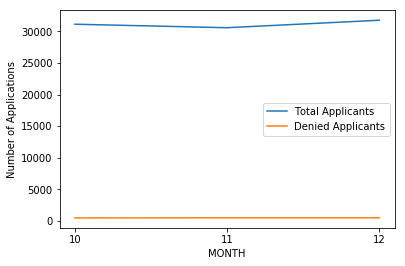

In [130]:
plt.plot(applied_monthwise.values[:,0],applied_monthwise.values[:,1],label = 'Total Applicants')
plt.plot(denied_monthwise.values[:,0],denied_monthwise.values[:,1], label = 'Denied Applicants')
plt.xlabel('MONTH')
plt.ylabel('Number of Applications')
plt.legend()